Disciplina: **Mineração de Dados**

Professor: **Wilson Castello Branco Neto**

Aula 9 - kNN - Exemplo

Nome: Wilson Castello Branco Neto

Importação das bibliotecas necessárias, leitura e apresentação dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('datasets\\atv9.csv')
dados

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
sns.scatterplot(data=dados, x = 'tempo_site', y = 'pag_visitadas', hue='compra')
plt.title('Tempo no Site e Páginas Visitadas X Compra')
plt.xlabel('Tempo no site (min)')
plt.ylabel('#Páginas visitadas')
plt.show()

ValueError: Could not interpret value `tempo_site` for `x`. An entry with this name does not appear in `data`.

Considere que um novo cliente ficou 11.7 minutos no site e visitou 7 páginas. Apresente no gráfico, utilizando um X vermelho, o novo cliente.

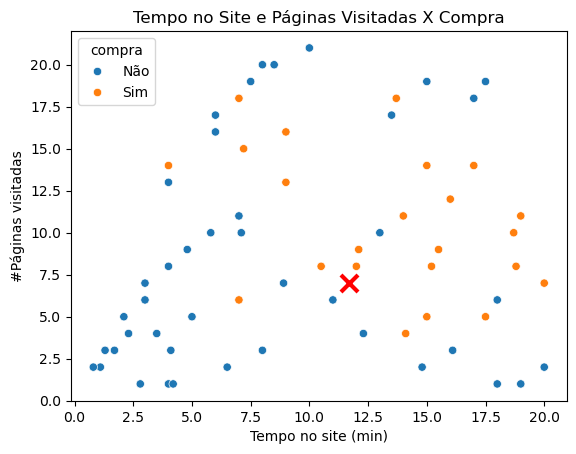

In [ ]:
sns.scatterplot(data=dados, x='tempo_site', y='pag_visitadas', hue='compra')
plt.scatter(11.7, 7, color='red', marker='x', s=150, linewidths=3, zorder=10)
plt.title('Tempo no Site e Páginas Visitadas X Compra')
plt.xlabel('Tempo no site (min)')
plt.ylabel('#Páginas visitadas')
plt.show()

Elabore uma função que receba por parâmetro os valores de x e y de dois pontos e calcule a distância euclidiana entre eles.

In [ ]:
def distancia_euclidiana(ponto1, ponto2):
    return np.sqrt((ponto1[0] - ponto2[0])**2 + (ponto1[1] - ponto2[1])**2)

Cálcule as distâncias entre o novo cliente e todos os clientes já cadastrados, armazene os resultados em uma nova coluna do dataframe e apresente-o.

In [ ]:
dados['distancia'] = dados.apply(lambda row: distancia_euclidiana((row['tempo_site'], row['pag_visitadas']), (11.7, 7)), axis=1)
dados

,tempo_site,pag_visitadas,compra,distancia
0,3.5,4,Não,8.731552
1,15.2,8,Sim,3.640055
2,1.1,2,Não,11.720068
3,12.0,8,Sim,1.044031
4,8.9,7,Não,2.800000
...,...,...,...,...
60,9.0,16,Sim,9.396276
61,18.8,8,Sim,7.170077
62,8.0,3,Não,5.448853
63,4.0,14,Sim,10.406248


Apresente novamente os dados do dataframe, mas agora ordenados pela distância em relação ao novo cliente (em ordem crescente).

In [ ]:
dados.sort_values(by='distancia')

,tempo_site,pag_visitadas,compra,distancia
3,12.0,8,Sim,1.044031
26,11.0,6,Não,1.220656
10,10.5,8,Sim,1.562050
9,12.1,9,Sim,2.039608
4,8.9,7,Não,2.800000
...,...,...,...,...
32,7.5,19,Não,12.713772
48,17.5,19,Não,13.328166
42,8.5,20,Não,13.388054
28,8.0,20,Não,13.516286


Apresente o índice do ponto mais próximo ao novo cliente, a sua distância e a classe deste ponto.

In [ ]:
indice_mais_proximo = dados['distancia'].idxmin()
distancia_mais_proxima = dados.loc[indice_mais_proximo, 'distancia']
classe_mais_proxima = dados.loc[indice_mais_proximo, 'compra']

print(f"Índice do ponto mais próximo: {indice_mais_proximo}")
print(f"Distância: {distancia_mais_proxima}")
print(f"Classe: {classe_mais_proxima}")

Índice do ponto mais próximo: 3
Distância: 1.0440306508910553
Classe: Sim
